In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df.shape

(1258, 6)

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
df1 = df.iloc[:,1:2]

In [6]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range = (0, 1))
df2 = mm.fit_transform(df1)
df2.shape

(1258, 1)

In [7]:
from keras.models import Sequential


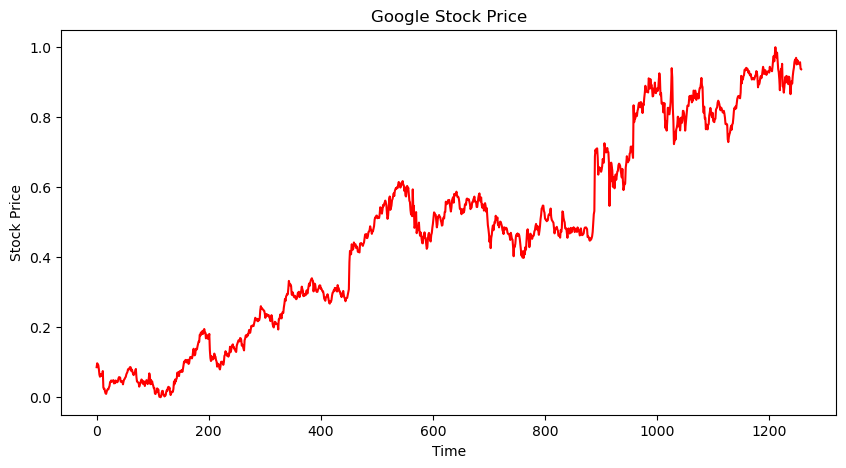

In [8]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,5))
plt.plot(df2, color ='red');
plt.ylabel('Stock Price')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.show()

In [9]:
#x_train = df2[59:1257]
#y_train = df2[60:1258]
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(df2[i-60:i, 0])
    y_train.append(df2[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
X_train.shape


(1198, 60, 1)

In [11]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [12]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(Dense(units = 1))

In [17]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [18]:
regressor.fit(X_train,y_train,epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 7s 65ms/step - loss: 0.0304
Epoch 2/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0040
Epoch 13/100
38/38 [=====

In [19]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_stock = test_data.iloc[:,1:2]

In [20]:
input_value = test_stock
input_value = mm.transform(input_value)
input_value = np.reshape(input_value, (20, 1, 1))

In [21]:
dataset_total = pd.concat((df1['Open'], test_data['Open']), axis = 0)
dataset_total.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [22]:
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = mm.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


prediction = regressor.predict(X_test)
prediction = mm.inverse_transform(prediction)


C:\Users\abbas\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


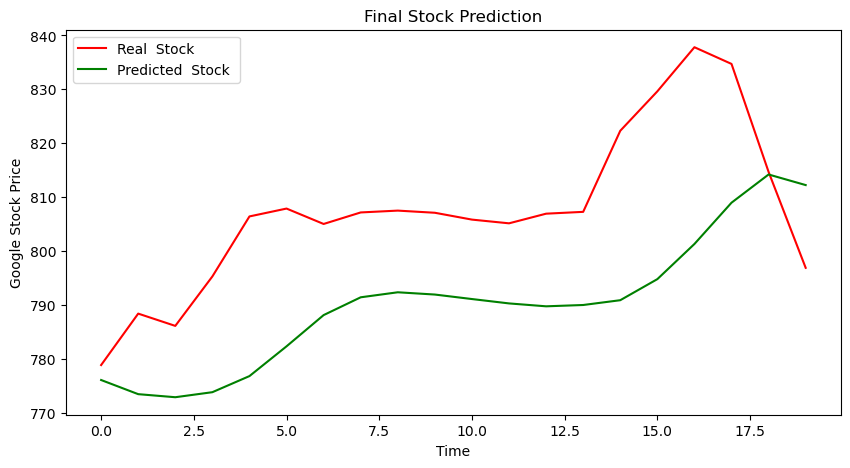

In [23]:
plt.rcParams['figure.figsize'] = (10, 5)

plt.plot(test_stock['Open'], color = 'red', label = 'Real  Stock ')
plt.plot(prediction, color = 'green', label = 'Predicted  Stock ')
plt.title('Final Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()